In [1]:
from pulsee.simulation import *

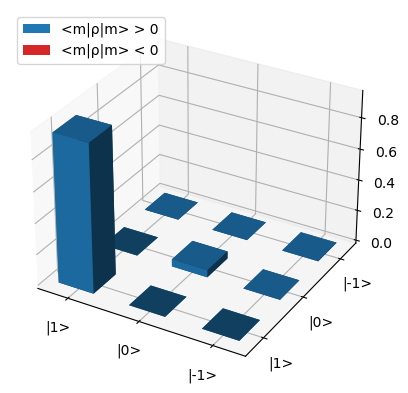

In [2]:
spin_par = {'quantum number' : 1.,
            'gamma/2pi' : 1.}
    
zeem_par = {'field magnitude' : 1.,
            'theta_z' : 0.,
            'phi_z' : 0.}
                
spin, h_unperturbed, dm_0 = nuclear_system_setup(spin_par=spin_par, quad_par=None, 
                                                 zeem_par=zeem_par, initial_state='canonical', 
                                                 temperature=1e-4)
fig = plot_real_part_density_matrix(dm_0)

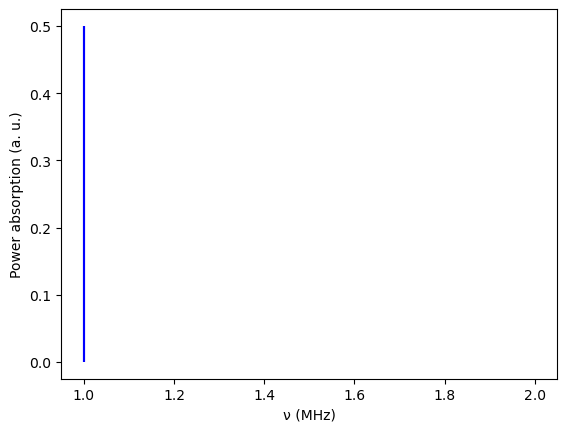

In [3]:
f, p = power_absorption_spectrum(spin, h_unperturbed, normalized=True)
_ = plot_power_absorption_spectrum(f, p)

In [4]:
mode = pd.DataFrame([(2 * np.pi, 0.2, 0., np.pi/2, 0.)], 
                     columns=['frequency', 'amplitude', 'phase', 'theta_p', 'phi_p'])

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 565.99it/s]


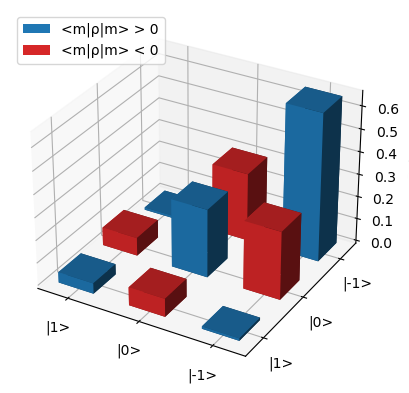

In [5]:
dm_evolved = evolve(spin, h_unperturbed, dm_0, solver=magnus, \
                    mode=mode, pulse_time=3 / (2 * 4 * 0.2), \
                    picture = 'IP', n_points=30)
    
fig = plot_real_part_density_matrix(dm_evolved)

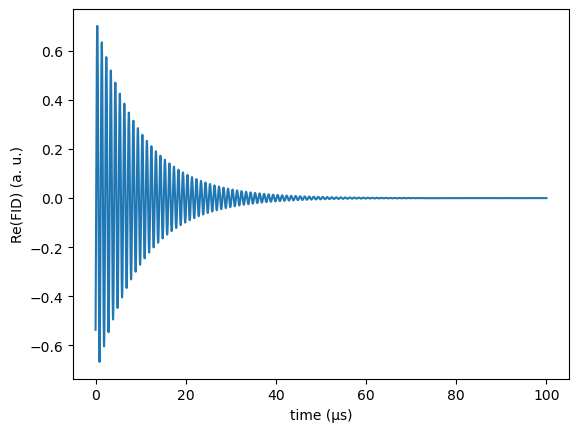

In [6]:
t, fid = FID_signal(spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=50)

_ = plot_real_part_FID_signal(t, fid)

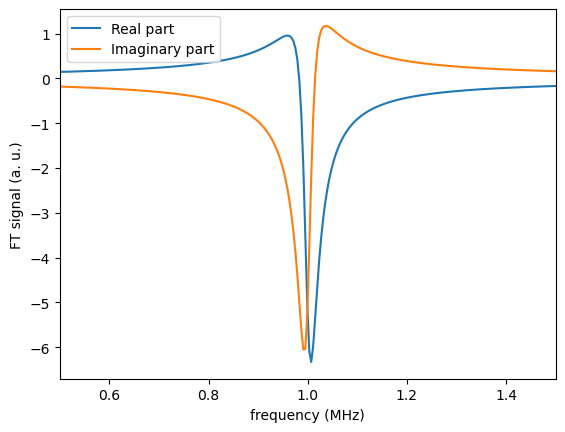

In [7]:
f, ft = legacy_fourier_transform_signal(t, fid, frequency_start = -2, frequency_stop = 2)
    
fig, ax = plot_fourier_transform(f, ft, square_modulus=False, xlim=(0.5, 1.5), norm=False)

In [8]:
quad_par = {'coupling constant' : 0.2,
            'asymmetry parameter' : 0.,
            'alpha_q' : 0.,
            'beta_q' : 0.,
            'gamma_q' : 0.,
            'order' : 0}
            
spin, h_unperturbed, dm_0 = nuclear_system_setup(spin_par=spin_par, quad_par=quad_par,
												 zeem_par=zeem_par, initial_state='canonical', 
												 temperature=1e-4)

In [9]:
dm_evolved = evolve(spin, h_unperturbed, dm_0, solver=magnus, \
                    mode=mode, pulse_time=3 / (2 * 4 * 0.2), \
                    picture = 'IP', n_points = 10)


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 500.01it/s]


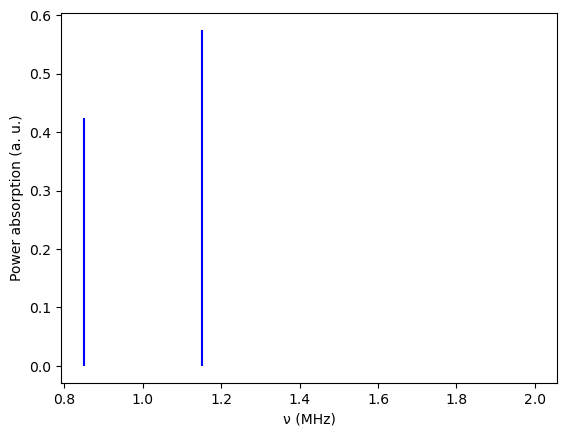

In [10]:
f, p = power_absorption_spectrum(spin, h_unperturbed, normalized=True)
_ = plot_power_absorption_spectrum(f, p)

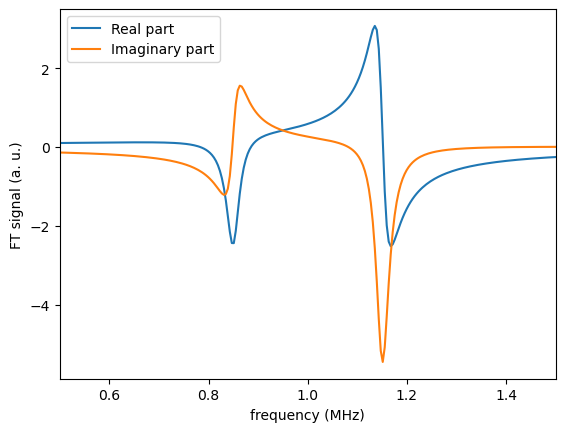

In [11]:
t, fid = FID_signal(spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=10)
f, ft = legacy_fourier_transform_signal(t, fid, frequency_start = -2, frequency_stop = 2) 
fig = plot_fourier_transform(f, ft, square_modulus=False, norm=False, xlim=(0.5, 1.5))

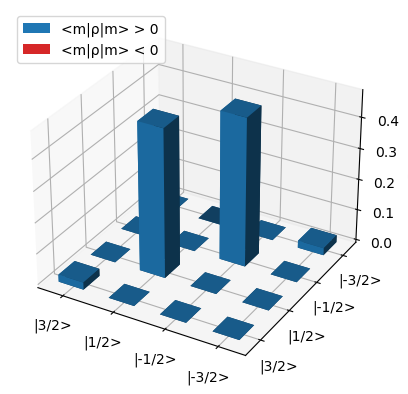

In [12]:
spin_par = {'quantum number' : 3/2,
            'gamma/2pi' : 1.}
    
quad_par = {'coupling constant' : 2.,
            'asymmetry parameter' : 0.,
            'alpha_q' : 0.,
            'beta_q' : 0.,
            'gamma_q' : 0.,
            'order' : 0.}
            
spin, h_unperturbed, dm_0 = nuclear_system_setup(spin_par=spin_par, 
												 quad_par=quad_par, zeem_par=None, 
												 initial_state='canonical', 
												 temperature=1e-4)
fig = plot_real_part_density_matrix(dm_0)

100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 508.46it/s]


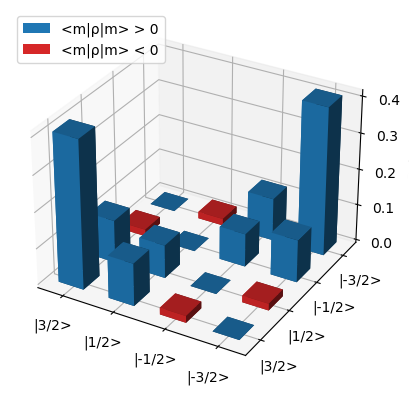

In [13]:
dm_evolved = evolve(spin, h_unperturbed, dm_0, solver=magnus, \
                    mode=mode, pulse_time=3 / (2 * 4 * 0.2), \
                    picture = 'IP', n_points = 60)
fig = plot_real_part_density_matrix(dm_evolved)

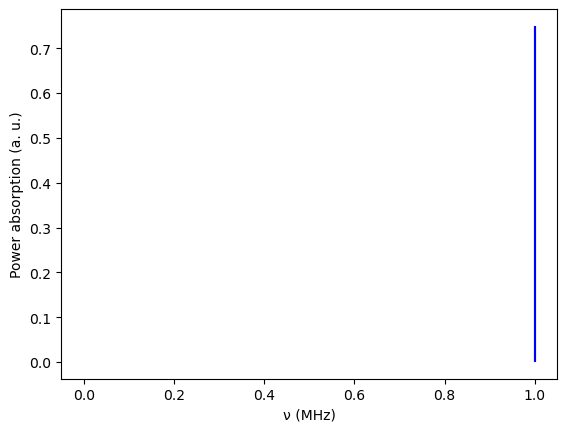

In [14]:
f, p = power_absorption_spectrum(spin, h_unperturbed, normalized=True)
_ = plot_power_absorption_spectrum(f, p)

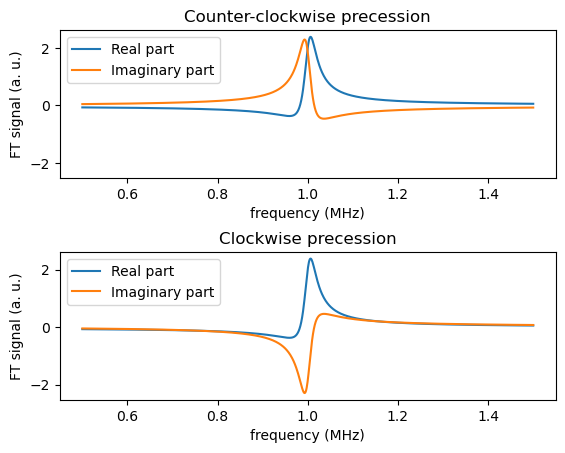

In [15]:
t, fid = FID_signal(spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=30)
f, ft, ft_n = legacy_fourier_transform_signal(t, fid, 0.5, 1.5, 
											  opposite_frequency=True)

fig = plot_fourier_transform(f, ft, ft_n, norm=False)